<a href="https://colab.research.google.com/github/MATHSMADHA/Unlocking-Paddy-Heritage-Deep-Learning-for-Feature-Extraction-and-Recognition/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preamble

In [ ]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

!pip install scikit-learn

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report

DATA IMPORTING

In [ ]:
from zipfile import ZipFile
file_name = '/content/GEN_DATA.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


Name to File

In [ ]:
name_class=os.listdir('/content/GEN_DATA')
name_class

['P1', 'P3', 'P2', 'P7', 'P6', 'P10', 'P4', 'P5', 'P8', 'P9 ', '.DS_Store']

In [ ]:
file_path='/content/GEN_DATA/'

In [ ]:
filepaths=list(glob.glob(file_path+'/**/*.*'))

In [ ]:
print(filepaths[0:2])

['/content/GEN_DATA/P1/Paddy1_0_5367.jpeg', '/content/GEN_DATA/P1/Paddy1_60.jpg']


In [ ]:
labels=list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

In [ ]:
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(10)

,Filepath,Label
0,/content/GEN_DATA/P6/Paddy6_0_1530.jpeg,P6
1,/content/GEN_DATA/P9 /Paddy9_0_6866.jpeg,P9
2,/content/GEN_DATA/P2/Paddy2_0_7793.jpeg,P2
3,/content/GEN_DATA/P2/Paddy2_0_6857.jpeg,P2
4,/content/GEN_DATA/P4/Paddy4_0_8047.jpeg,P4
5,/content/GEN_DATA/P8/Paddy8_0_5570.jpeg,P8
6,/content/GEN_DATA/P5/Paddy5_0_454.jpeg,P5
7,/content/GEN_DATA/P9 /Paddy9_0_9527.jpeg,P9
8,/content/GEN_DATA/P5/Paddy5_0_2706.jpeg,P5
9,/content/GEN_DATA/P5/Paddy5_57.jpg,P5


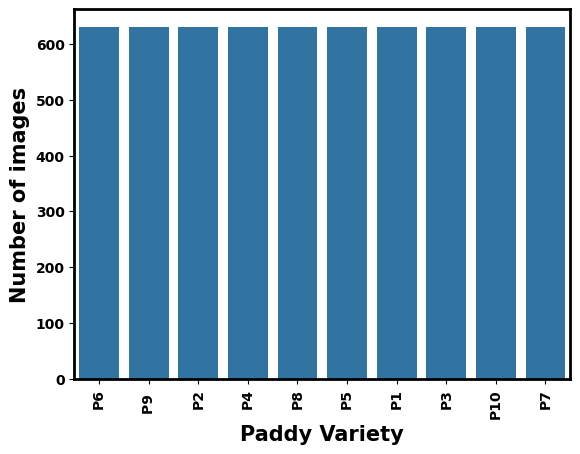

In [ ]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Paddy Variety', fontsize=15, weight='bold')
plt.ylabel('Number of images', fontsize=15, weight='bold')
plt.yticks(fontsize=10,weight='bold')
plt.xticks(rotation=90, fontsize=10,weight='bold');
#for axis in ['top', 'bottom', 'left','right']:
plt.rcParams['axes.linewidth']=20


Training and Testing

In [ ]:
train, test = train_test_split(data, test_size=0.25, random_state=42)


In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

Pre Processing Input

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


In [ ]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(250,250),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(250,250),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(250,250),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 4725 validated image filenames belonging to 10 classes.
Found 1575 validated image filenames belonging to 10 classes.
Found 1575 validated image filenames belonging to 10 classes.


In [ ]:
pretrained_model = ResNet50(
    input_shape=(250,250,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)


In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
#model.compile(
 #   optimizer='adam',
  #  loss='categorical_crossentropy.',
   # metrics=['accuracy']
#)

model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])


In [ ]:
my_callbacks = [EarlyStopping(monitor='val_accuracy',
                             min_delta=0,
                             patience=2,
                             mode='auto')]

In [ ]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=10)
callback=my_callbacks

Epoch 1/10
148/148 [==============================] - 1412s 10s/step - loss: 0.2638 - accuracy: 0.9242 - val_loss: 0.0814 - val_accuracy: 0.9778
Epoch 2/10
148/148 [==============================] - 1354s 9s/step - loss: 0.0485 - accuracy: 0.9824 - val_loss: 0.0617 - val_accuracy: 0.9784
Epoch 3/10
148/148 [==============================] - 1362s 9s/step - loss: 0.0351 - accuracy: 0.9875 - val_loss: 0.0358 - val_accuracy: 0.9854
Epoch 4/10
148/148 [==============================] - 1377s 9s/step - loss: 0.0267 - accuracy: 0.9911 - val_loss: 0.0339 - val_accuracy: 0.9860
Epoch 5/10
148/148 [==============================] - 1329s 9s/step - loss: 0.0177 - accuracy: 0.9937 - val_loss: 0.0284 - val_accuracy: 0.9892
Epoch 6/10
148/148 [==============================] - 1365s 9s/step - loss: 0.0202 - accuracy: 0.9928 - val_loss: 0.0368 - val_accuracy: 0.9860
Epoch 7/10
148/148 [==============================] - 1295s 9s/step - loss: 0.0202 - accuracy: 0.9939 - val_loss: 0.0245 - val_accuracy

Model Save

In [ ]:
model.save("model_resnet50_augmented.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


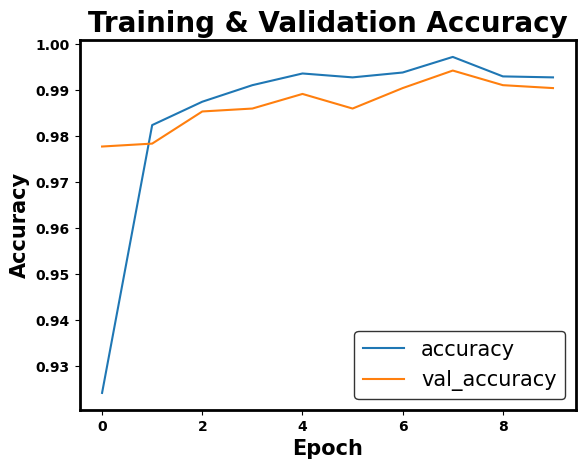

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Training & Validation Accuracy", fontsize=20, weight='bold')
plt.ylabel("Accuracy", fontsize=15, weight='bold')
plt.xlabel("Epoch", fontsize=15, weight='bold')
plt.legend(fontsize=15, edgecolor='black')
plt.yticks(fontsize=10,weight='bold')
plt.xticks(fontsize=10,weight='bold')
plt.rcParams['axes.linewidth']=1
plt.show()


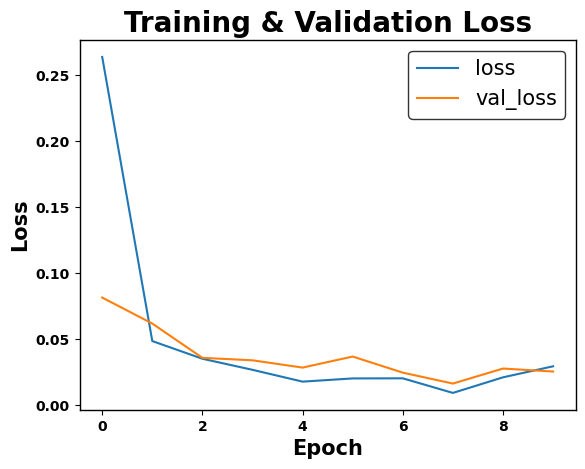

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Training & Validation Loss", fontsize=20, weight='bold')
plt.ylabel("Loss", fontsize=15, weight='bold')
plt.xlabel("Epoch", fontsize=15, weight='bold')
plt.legend(fontsize=15, edgecolor='black')
plt.yticks(fontsize=10,weight='bold')
plt.xticks(fontsize=10,weight='bold')
plt.rcParams['axes.linewidth']=2
plt.show()

In [ ]:
results = model.evaluate(test_gen, verbose=0)
print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))


    Test Loss: 0.02540
Test Accuracy: 99.05%


In [ ]:
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]


50/50 [==============================] - 333s 7s/step


In [ ]:
y_test = list(test.Label)
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

          P1       1.00      1.00      1.00       159
         P10       0.99      0.97      0.98       152
          P2       0.99      0.99      0.99       163
          P3       0.99      1.00      1.00       169
          P4       0.99      0.97      0.98       156
          P5       1.00      0.99      1.00       137
          P6       0.99      0.99      0.99       151
          P7       1.00      0.99      0.99       163
          P8       0.98      1.00      0.99       169
         P9        0.98      1.00      0.99       156

    accuracy                           0.99      1575
   macro avg       0.99      0.99      0.99      1575
weighted avg       0.99      0.99      0.99      1575



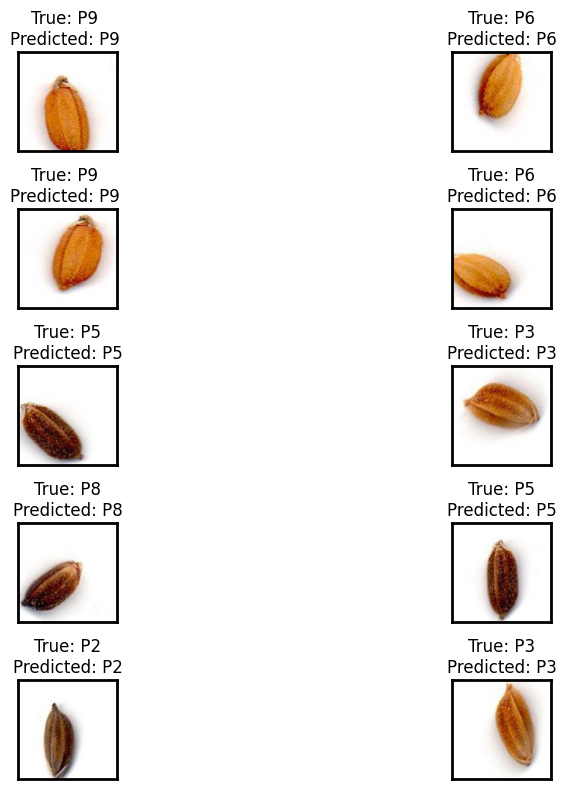

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})

#for i, ax in enumerate(axes.flat):
 #   ax.imshow(plt.imread(test.Filepath.iloc[i]))
  #  ax.set_title(f*True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
#plt.tight_layout()
#plt.show()
for i, ax in enumerate(axes.flat):
    if i>=len(pred):
        break
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()